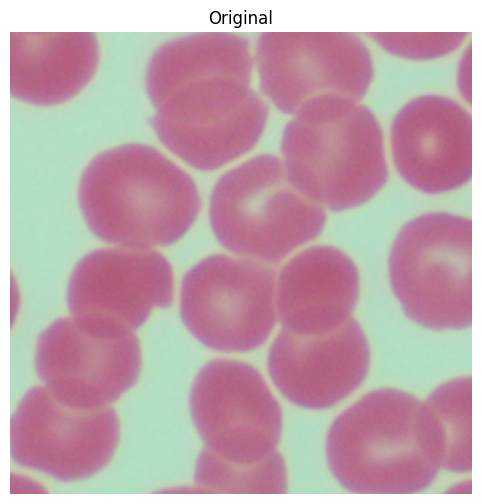

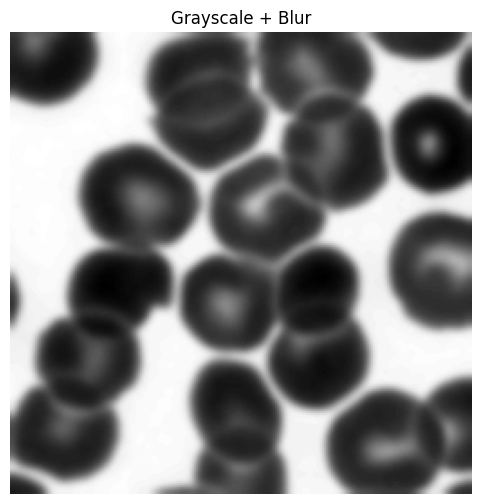

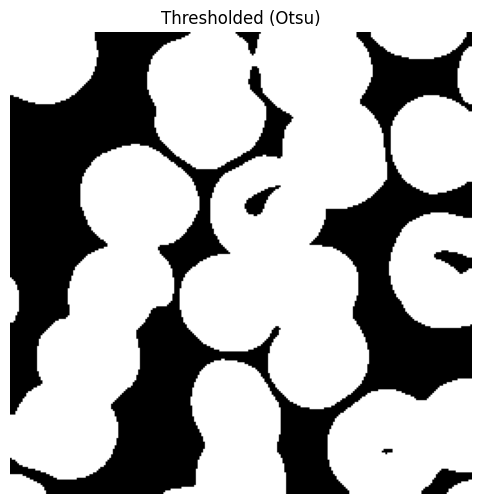

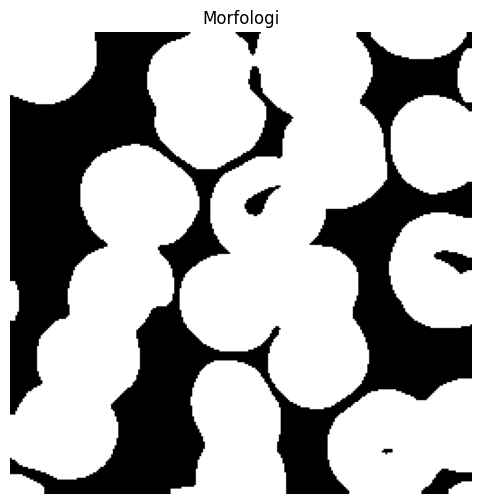

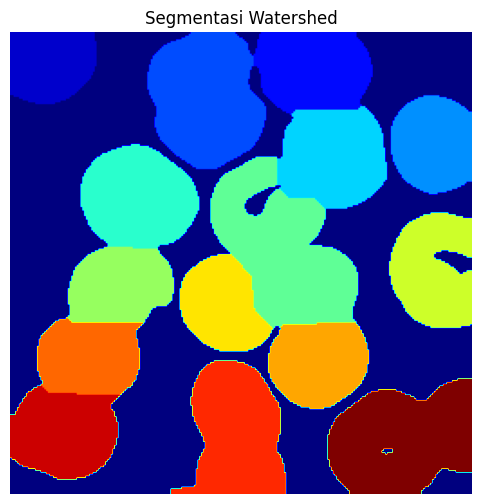

Total sel darah: 15


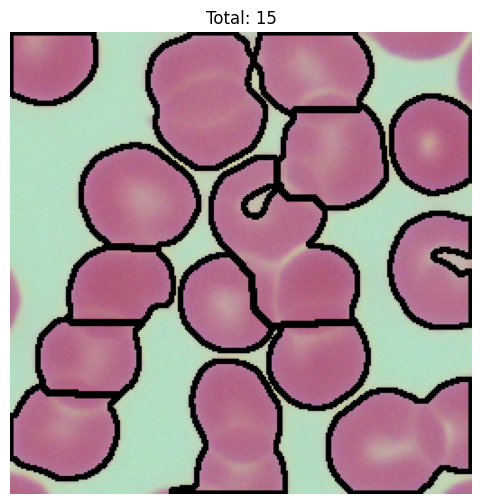

In [ ]:
from scipy import ndimage
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# load gambar
imported_pic = "sample-1.jpg"
# imported_pic = "sample-2.png"

# fungsi preview
def plot_image(title, image, cmap):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

# baca dengan opencv-python
image = cv2.imread(imported_pic)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
plot_image('Original', image, None)

# grayscale & gaussian blur
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
plot_image('Grayscale + Blur', blurred, 'gray')

# Thresholding (Metode Otsu)
_, threshholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plot_image('Thresholded (Otsu)', threshholded, 'gray')

# operasi Morfologi
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(threshholded, cv2.MORPH_OPEN, kernel, iterations=2)
plot_image('Morfologi', opening, 'gray')

# Distance + Watershed
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
local_max = peak_local_max(dist_transform, min_distance=20, labels=opening)
mask = np.zeros(dist_transform.shape, dtype=bool)
mask[tuple(local_max.T)] = True
markers, _ = ndimage.label(mask)
marking = watershed(-dist_transform, markers, mask=opening)

# plot Hasil & jumlah cell
plot_image('Segmentasi Watershed', marking, 'jet')
total_cell = len(np.unique(marking)) - 1
print(f"Total sel darah: {total_cell}")

# gambar garis batas
contours = []
for label in np.unique(marking):
    if label == 0:
        continue
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[marking == label] = 255
    cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours.extend(cnts)

output = image.copy()
cv2.drawContours(output, contours, -1, (0,0,0), 2)

plot_image(f"Total: {total_cell}", output, None)